# Análisis multivariable empleando el dataset Titanic

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
url = 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'
titanic_data_set = pd.read_csv(url, error_bad_lines=False)

In [42]:
titanic_data_set.shape

(891, 12)

In [43]:
titanic_data_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Buscando datos nulos

In [44]:
titanic_data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Tasa de supervivencia por sexo

### Mujer

In [45]:
mujeres = titanic_data_set.loc[titanic_data_set.Sex == 'female']['Survived']
taza_mujeres = sum(mujeres/len(mujeres))
taza_mujeres

0.7420382165605095

### Hombre

In [46]:
male = titanic_data_set.loc[titanic_data_set.Sex == 'male']['Survived']
taza_male = sum(male/len(male))
taza_male

0.1889081455805897

Agregando una campo de texto diciendo si la persona sobrevivio o no sobrevivio

In [47]:
titanic_data_set['name_survived'] = titanic_data_set['Survived'].map(
    {0: 'No_survived', 1: 'survived'}
)

## Graficando la Supervivencia por Sexo

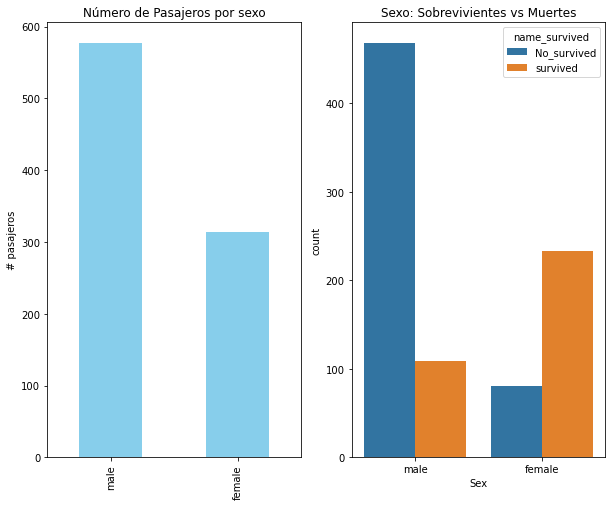

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
titanic_data_set["Sex"].value_counts().plot.bar(
    color = "skyblue",
    ax =ax[0]
)
ax[0].set_title("Número de Pasajeros por sexo")
ax[0].set_ylabel("# pasajeros")

sns.countplot(
    x="Sex",
    hue = "name_survived",
    data = titanic_data_set,
    ax = ax[1]
)
ax[1].set_title("Sexo: Sobrevivientes vs Muertes")
plt.show()

## Distribución de la edad 

<AxesSubplot:xlabel='Age', ylabel='Count'>

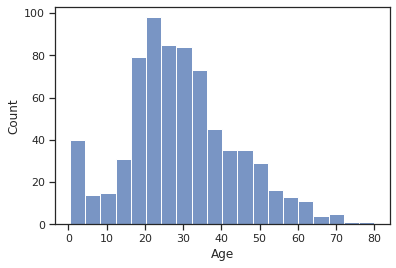

In [71]:
sns.histplot(x = titanic_data_set['Age'].dropna())

## Comparando la Edad y el Tipo de clase de los pasajeros.

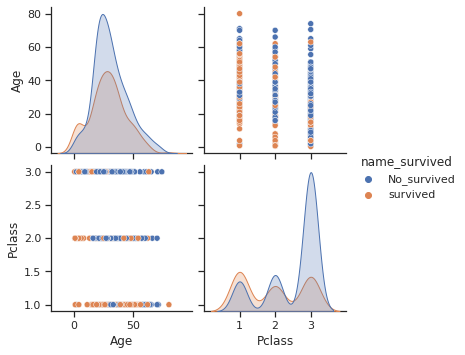

In [60]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(titanic_data_set, vars=['Age', 'Pclass'], hue='name_survived')

## Dato Interesante de los metodo de correlación!
- **pearson**: La correlación de Pearson evalúa la relación lineal entre dos variables continuas. Una relación es lineal cuando un cambio en una variable se asocia con un cambio proporcional en la otra variable.

    **Por ejemplo**, usted puede usar una correlación de Pearson para evaluar si los aumentos de temperatura en sus instalaciones de producción están asociados con una disminución en el espesor de las capas de chocolate.
- **spearman**: La correlación de Spearman evalúa la relación monótona entre dos variables continuas u ordinales. En una relación monótona, las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante. El coeficiente de correlación de Spearman se basa en los valores jerarquizados de cada variable y no en los datos sin procesar.
    
    **Por ejemplo**, usted puede usar una correlación de Spearman para evaluar si el orden en que los empleados completan un ejercicio de prueba se relaciona con el número de meses que han estado trabajando en la empresa.


## Correlación

In [68]:
cor_titanic = titanic_data_set.corr(method='spearman')
cor_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


<AxesSubplot:>

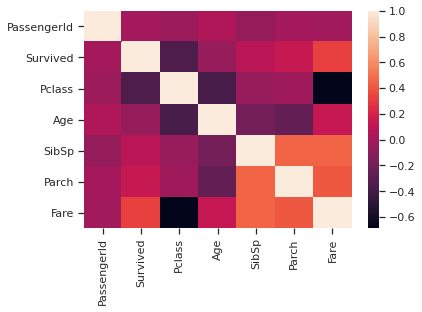

In [69]:
sns.heatmap(cor_titanic)